In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nmlo-contest-1/test.csv
/kaggle/input/nmlo-contest-1/sample_submission.csv
/kaggle/input/nmlo-contest-1/train.csv


In [2]:

train_data = pd.read_csv('/kaggle/input/nmlo-contest-1/train.csv')
test_data = pd.read_csv('/kaggle/input/nmlo-contest-1/test.csv')
train = train_data.copy()
test = test_data.copy()


In [3]:
train.shape


(4000, 12)

**Train**

In [4]:
train.drop_duplicates(inplace=True)
train["bmi"] = train["weight"] / (train["height"]/100)**2

In [5]:
top_filter = ((train["ap_hi"]>250) | (train["ap_lo"]>200))
#train = train[~top_filter]
bot_filter = ((train["ap_hi"] < 0) | (train["ap_lo"] < 0))
#train = train[~bot_filter]
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,17363,1,172,89.0,110,70,1,1,0,1,0,0,30.083829
1,21200,1,168,68.0,110,70,1,1,0,0,1,0,24.092971
2,17286,1,167,74.0,120,80,1,1,0,0,1,0,26.533759
3,15822,1,157,61.0,90,70,1,1,0,0,1,0,24.747454
4,20458,1,156,55.0,110,70,1,1,0,0,1,0,22.600263


**Test**

In [6]:
test.drop_duplicates(inplace=True)
test["bmi"] = test["weight"] / (test["height"]/100)**2

top_filter = ((test["ap_hi"]>250) | (test["ap_lo"]>200))
#test = test[~top_filter]
bot_filter = ((test["ap_hi"] < 0) | (test["ap_lo"] < 0))
#test = test[~bot_filter]
test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,0,16036,1,165,125.0,160,100,1,2,0,0,0,45.913682
1,1,17004,1,165,120.0,100,75,2,1,0,0,1,44.077135
2,2,17547,1,151,58.0,110,60,2,1,0,0,1,25.437481
3,3,20562,1,172,70.0,130,90,1,1,0,0,1,23.661439
4,4,18759,1,168,64.0,110,80,1,1,0,0,1,22.675737


In [7]:
print(train.shape, test.shape)

(4000, 13) (1000, 13)


**Splitting**

In [8]:
y_train = train['cardio']
X_train = train.drop('cardio', axis=1)
id = test_data['id']
X_test = test.drop('id', axis=1)

In [9]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,17363,1,172,89.0,110,70,1,1,0,1,0,30.083829
1,21200,1,168,68.0,110,70,1,1,0,0,1,24.092971
2,17286,1,167,74.0,120,80,1,1,0,0,1,26.533759
3,15822,1,157,61.0,90,70,1,1,0,0,1,24.747454
4,20458,1,156,55.0,110,70,1,1,0,0,1,22.600263


In [10]:
X_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,16036,1,165,125.0,160,100,1,2,0,0,0,45.913682
1,17004,1,165,120.0,100,75,2,1,0,0,1,44.077135
2,17547,1,151,58.0,110,60,2,1,0,0,1,25.437481
3,20562,1,172,70.0,130,90,1,1,0,0,1,23.661439
4,18759,1,168,64.0,110,80,1,1,0,0,1,22.675737


In [11]:
y_train.value_counts()

0    2020
1    1980
Name: cardio, dtype: int64

In [12]:
def bar_chart(feature):
    survived = train[train['cardio']==1][feature].value_counts()
    dead = train[train['cardio']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['cardio','healthy']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

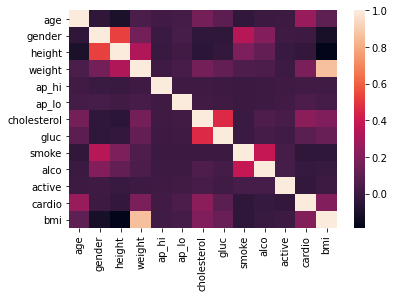

In [13]:
sns.heatmap(train.corr(),cbar='plasma')


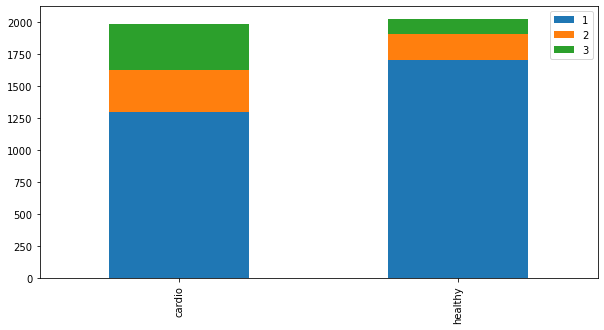

In [14]:
bar_chart('cholesterol')


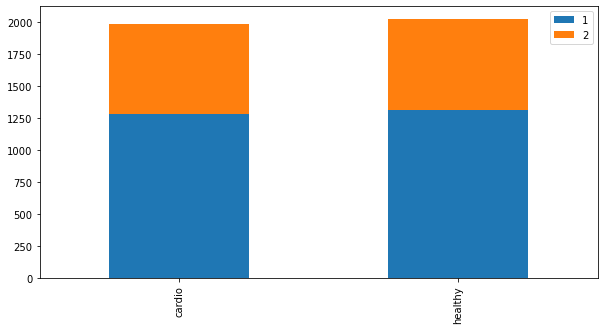

In [15]:
bar_chart('gender')


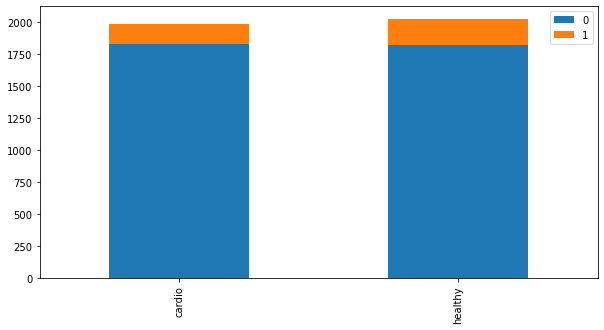

In [16]:
bar_chart('smoke')


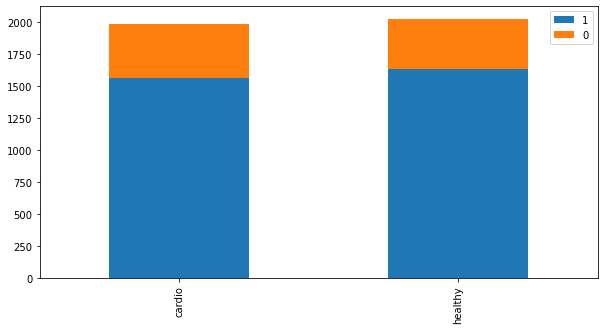

In [17]:
bar_chart('active')


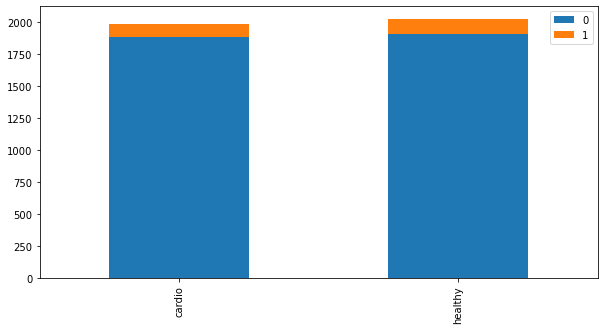

In [18]:
bar_chart('alco')


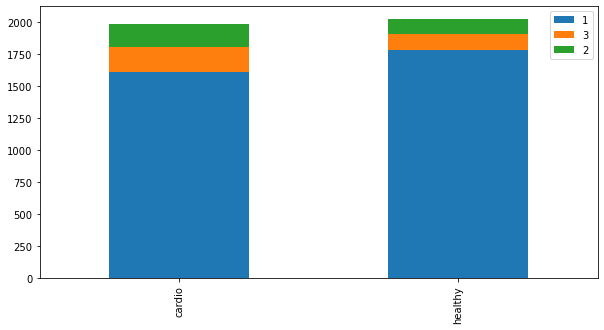

In [19]:
bar_chart('gluc')


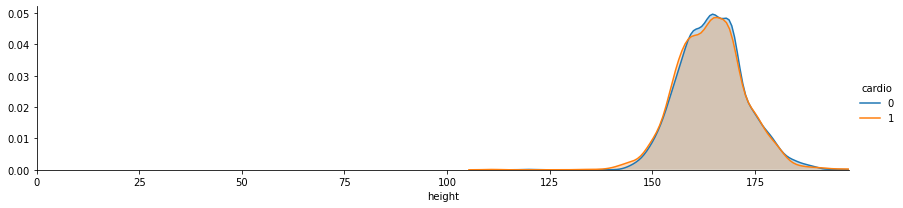

In [20]:
facet = sns.FacetGrid(train, hue="cardio",aspect=4)
facet.map(sns.kdeplot,'height',shade= True)
facet.set(xlim=(0, train['height'].max()))
facet.add_legend()
 
plt.show()

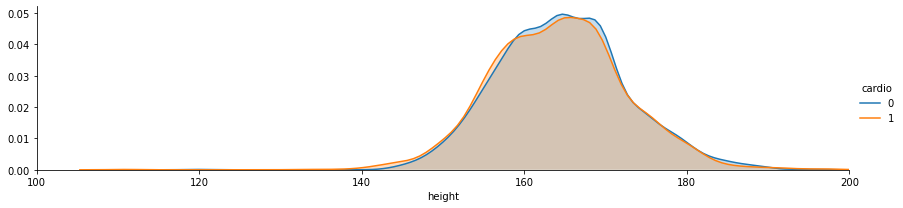

In [21]:
facet = sns.FacetGrid(train, hue="cardio",aspect=4)
facet.map(sns.kdeplot,'height',shade= True)
facet.set(xlim=(0, train['height'].max()))
facet.add_legend()
plt.xlim(100, 200)

plt.show()

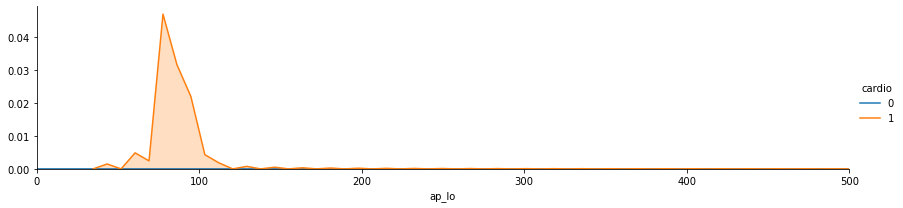

In [22]:
facet = sns.FacetGrid(train, hue="cardio",aspect=4)
facet.map(sns.kdeplot,'ap_lo',shade= True)
facet.set(xlim=(0, train['ap_lo'].max()))
facet.add_legend()
plt.xlim(0, 500)

plt.show()

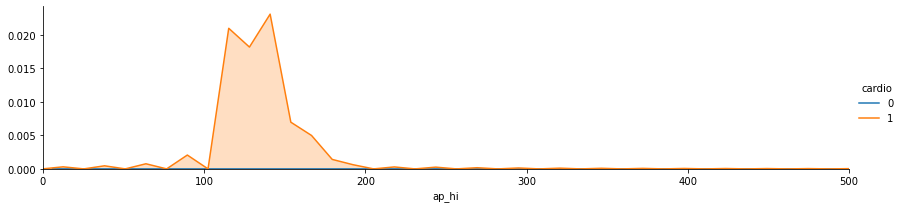

In [23]:
facet = sns.FacetGrid(train, hue="cardio",aspect=4)
facet.map(sns.kdeplot,'ap_hi',shade= True)
facet.set(xlim=(0, train['ap_hi'].max()))
facet.add_legend()
plt.xlim(0, 500)

plt.show()

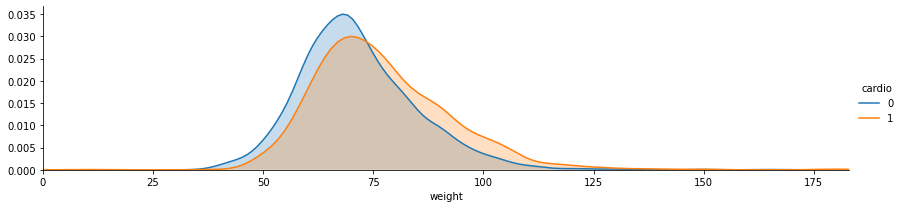

In [24]:
facet = sns.FacetGrid(train, hue="cardio",aspect=4)
facet.map(sns.kdeplot,'weight',shade= True)
facet.set(xlim=(0, train['weight'].max()))
facet.add_legend()
 
plt.show()

In [25]:
train.corr().T

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.037283,-0.100046,0.045356,0.020510,0.028721,0.165362,0.096951,-0.034098,-0.005863,0.000518,0.264648,0.101326
gender,-0.037283,1.000000,0.529250,0.160477,-0.003661,0.034800,-0.039357,-0.040184,0.348177,0.210509,0.007654,0.005259,-0.112354
height,-0.100046,0.529250,1.000000,0.323227,-0.008177,0.020686,-0.048899,-0.026437,0.190756,0.117636,-0.010074,-0.029716,-0.187769
weight,0.045356,0.160477,0.323227,1.000000,0.009849,0.035883,0.164882,0.114695,0.054882,0.053201,0.001379,0.182323,0.862915
ap_hi,0.020510,-0.003661,-0.008177,0.009849,1.000000,0.010284,0.007592,-0.001261,-0.005912,0.003920,0.009445,0.019603,0.014069
ap_lo,0.028721,0.034800,0.020686,0.035883,0.010284,1.000000,0.020132,0.008145,-0.006179,0.002377,0.019106,0.049005,0.028567
cholesterol,0.165362,-0.039357,-0.048899,0.164882,0.007592,0.020132,1.000000,0.462455,-0.005754,0.057154,0.035800,0.228748,0.195720
gluc,0.096951,-0.040184,-0.026437,0.114695,-0.001261,0.008145,0.462455,1.000000,-0.004742,0.029545,0.012669,0.092133,0.132006
smoke,-0.034098,0.348177,0.190756,0.054882,-0.005912,-0.006179,-0.005754,-0.004742,1.000000,0.385201,0.030722,-0.039721,-0.041688
alco,-0.005863,0.210509,0.117636,0.053201,0.003920,0.002377,0.057154,0.029545,0.385201,1.000000,0.032688,-0.016558,-0.008523


In [26]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
tttrain, tttest, target, target_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [27]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
import xgboost as xgb
from xgboost import XGBClassifier

In [28]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(np.mean(score))

[0.5825 0.64   0.6125 0.5925 0.6225 0.665  0.6025 0.6075 0.665  0.6425]
0.6232500000000001


In [29]:
clf.fit(tttrain, target)
acc_decision_tree = round(clf.score(tttrain, target) * 100, 2)
acc_decision_tree

100.0

In [30]:
acc_test_decision_tree = round(clf.score(tttest, target_test) * 100, 2)
acc_test_decision_tree

63.25

# **Random Forest**

In [31]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300, 500]}, cv=5).fit(tttrain, target)
random_forest.fit(tttrain, target)
acc_random_forest = round(random_forest.score(tttrain, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)


100.0 {'n_estimators': 500}


In [32]:
acc_test_random_forest = round(random_forest.score(tttest, target_test) * 100, 2)
acc_test_random_forest

69.12

In [33]:

def xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, tttrain, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_xgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.005),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.005),
            'gamma': hp.quniform('gamma', 0.5, 1, 0.005),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'tree_method': 'exact',
            'verbosity': 0,
            'missing': None
        }
 
best = fmin(fn=xgb_score, space=space_xgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.720625
{'booster': 'gbtree', 'colsample_bytree': 0.85, 'eta': 0.13, 'eval_metric': 'auc', 'gamma': 0.64, 'learning_rate': 0.0054, 'max_depth': 2, 'min_child_weight': 6.125, 'missing': None, 'n_estimators': 145, 'objective': 'binary:logistic', 'subsample': 0.645, 'tree_method': 'exact', 'verbosity': 0}
0.7046875
{'booster': 'gbtree', 'colsample_bytree': 0.615, 'eta': 0.39, 'eval_metric': 'auc', 'gamma': 0.745, 'learning_rate': 0.0409, 'max_depth': 8, 'min_child_weight': 1.475, 'missing': None, 'n_estimators': 805, 'objective': 'binary:logistic', 'subsample': 0.9, 'tree_method': 'exact', 'verbosity': 0}
0.7228125
{'booster': 'gbtree', 'colsample_bytree': 0.81, 'eta': 0.17500000000000002, 'eval_metric': 'auc', 'gamma': 0.585, 'learning_rate': 0.0194, 'max_depth': 5, 'min_child_weight': 1.2750000000000001, 'missing': None, 'n_estimators': 607, 'objective': 'binary:logistic', 'subsample': 0.805, 'tree_method': 'exact', 'verbosity': 0}
0.69375
{'booster': 'gbtree', 'colsample_bytree': 0.54

In [34]:
params = space_eval(space_xgb, best)
params

{'booster': 'gbtree',
 'colsample_bytree': 0.54,
 'eta': 0.215,
 'eval_metric': 'auc',
 'gamma': 0.965,
 'learning_rate': 0.0497,
 'max_depth': 11,
 'min_child_weight': 4.275,
 'missing': None,
 'n_estimators': 985,
 'objective': 'binary:logistic',
 'subsample': 0.5650000000000001,
 'tree_method': 'exact',
 'verbosity': 0}

In [35]:
XGB_Classifier = XGBClassifier(**params)
XGB_Classifier.fit(tttrain, target)
acc_XGB_Classifier = round(XGB_Classifier.score(tttrain, target) * 100, 2)
acc_XGB_Classifier

95.88

In [36]:
acc_test_XGB_Classifier = round(XGB_Classifier.score(tttest, target_test) * 100, 2)
acc_test_XGB_Classifier

67.12

In [37]:
y_pred = XGB_Classifier.predict(X_test)

pred=pd.DataFrame(y_pred)

y_final = (y_pred > 0.5).astype(int).reshape(test.shape[0])
print(y_final)

output = pd.DataFrame({'id': test['id'], 'cardio': y_final})
output.to_csv('output.csv', index=False)

[1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 1 1 

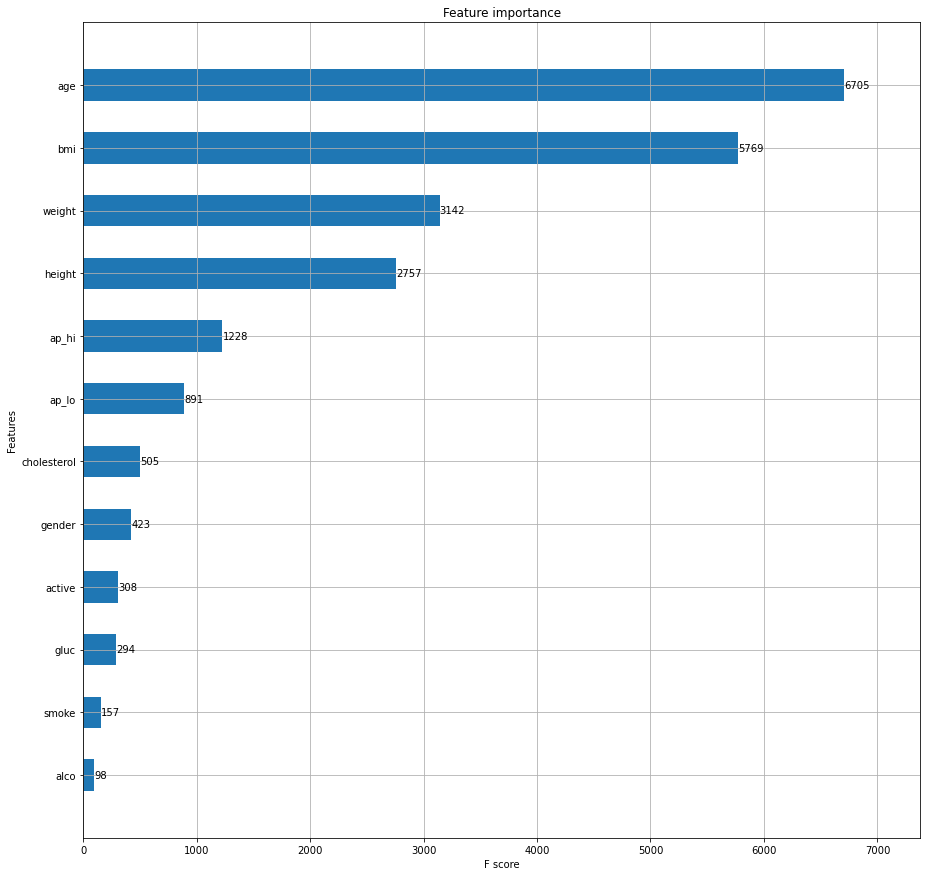

In [38]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(XGB_Classifier,ax = axes,height =0.5)
plt.show();
plt.close()

In [39]:
import xgboost
regressor1=xgboost.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200, 300, 500,700, 900]
criterion = ['gini', 'entropy']
depth = [3,5,10,15]
min_split=[2,3,4]
min_leaf=[2,3,4]
bootstrap = ['True', 'False']
verbose = [5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'criterion':criterion,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

random_cv = RandomizedSearchCV(estimator=regressor1,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, 
                               return_train_score = True,
                               random_state=42)
random_cv.fit(X_train,y_train)


regressor1 = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
regressor1.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
random_cv.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', bootstrap='True',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             criterion='gini', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=15, min_child_weight=1,
             min_samples_leaf=4, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbose=5, ...)

In [41]:
#preds